In [ ]:
# import os
# os.chdir('/content/drive/My Drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip Cropped_final-20240216T223358Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cropped_final/people/0255_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0242_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0267_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0251_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0241_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0247_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0252_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0250_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0253_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0242_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0249_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0241_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0240_p_crop01_detections.jpg  
  inflating: Cropped_final/people/0236_p_crop00_detections.jpg  
  inflating: Cropped_final/people/0236_

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)
        img = img.to(device)
        # label=label.to(device)
        return img, label



cpu


In [ ]:
import os
from sklearn.model_selection import train_test_split

# Path to the main folder containing subfolders for each class
main_folder = '/content/drive/MyDrive/Cropped_final'

# List all subfolders (each subfolder represents a class)
class_folders = [os.path.join(main_folder, folder) for folder in os.listdir(main_folder)]

# Create lists to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each class folder
for class_idx, class_folder in enumerate(class_folders):
    # Get all image file names in the class folder
    image_files = [os.path.join(class_folder, file) for file in os.listdir(class_folder) if file.endswith('.jpg')]

    # Add image paths to the list
    image_paths.extend(image_files)

    # Add corresponding labels
    labels.extend([class_idx] * len(image_files))

print(image_paths)
print(labels)
# Perform stratified random split

train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.1, stratify=train_labels)



['/content/drive/MyDrive/Cropped_final/amur_leopard/0609_al_n_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0610_al_d_s_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0616_al_d_w_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0615_al_d_w_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0614_al_n_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0610_al_d_w_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0625_al_d_w_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0619_al_d_w_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0626_al_n_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0624_al_n_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard/0618_al_d_s_crop00_detections.jpg', '/content/drive/MyDrive/Cropped_final/amur_leopard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision.transforms import ToTensor, Resize, Normalize

# Define transformations
transform = transforms.Compose([
    Resize((224, 224)),  # Resize images to a fixed size
    ToTensor(),  # Convert images to PyTorch tensors
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Create custom datasets
train_dataset = CustomDataset(train_paths, train_labels, transform=transform)
val_dataset = CustomDataset(val_paths, val_labels, transform=transform)
test_dataset = CustomDataset(test_paths, test_labels, transform=transform)

# print(train_dataset)
subset_size = 1
for i in range(subset_size):
    image_path, label = train_dataset[i]
    print(f"Image Path: {image_path}, Label: {label}")

# Create data loaders
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# train_loader=train_loader.to(device)
# val_loader=val_loader.to(device)
# test_loader=test_loader.to(device)

Image Path: tensor([[[-0.8507, -0.6281, -0.5767,  ...,  0.6221,  0.6563,  0.6734],
         [-0.9020, -0.7822, -0.8335,  ...,  0.6392,  0.6563,  0.6906],
         [-0.8164, -0.7822, -0.9363,  ...,  0.6221,  0.6392,  0.6734],
         ...,
         [ 1.3242,  1.1187,  1.1700,  ...,  1.6495,  1.4612,  1.4612],
         [ 1.1358,  1.0502,  1.2557,  ...,  1.6667,  1.4269,  1.4783],
         [ 0.8789,  1.0331,  1.3584,  ...,  1.7694,  1.5468,  1.5468]],

        [[-0.7402, -0.5126, -0.4601,  ...,  0.7654,  0.8004,  0.8179],
         [-0.7927, -0.6702, -0.7227,  ...,  0.7829,  0.8004,  0.8354],
         [-0.7052, -0.6702, -0.8277,  ...,  0.7654,  0.7829,  0.8179],
         ...,
         [ 1.4832,  1.2731,  1.3256,  ...,  1.8158,  1.6232,  1.6232],
         [ 1.2906,  1.2031,  1.4132,  ...,  1.8333,  1.5882,  1.6408],
         [ 1.0280,  1.1856,  1.5182,  ...,  1.9384,  1.7108,  1.7108]],

        [[-0.5147, -0.2881, -0.2358,  ...,  0.9842,  1.0191,  1.0365],
         [-0.5670, -0.4450, -0.49

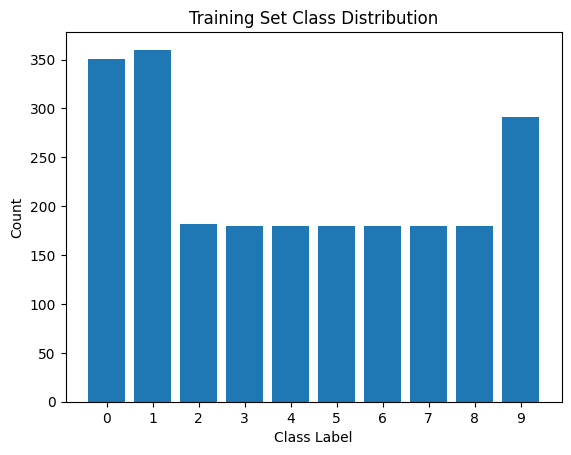

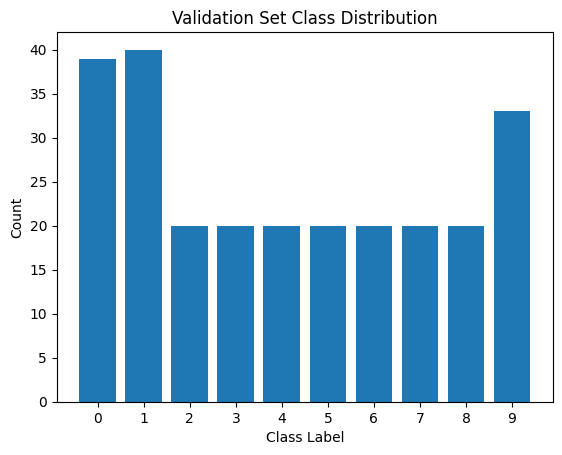

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize class distribution
def visualize_class_distribution(dataset, title):
    labels = np.array(dataset.labels)
    class_counts = np.bincount(labels)
    classes = np.arange(len(class_counts))

    plt.bar(classes, class_counts)
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(classes)
    plt.show()

# Visualize training set class distribution
visualize_class_distribution(train_dataset, 'Training Set Class Distribution')

# Visualize validation set class distribution
visualize_class_distribution(val_dataset, 'Validation Set Class Distribution')


In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool_first = nn.MaxPool2d(kernel_size=4, stride=4)
        # self.fc = nn.Linear(128 * 4 * 4, num_classes)  # Adjust input size based on image dimensions
        self.fc = nn.LazyLinear( num_classes)
    def forward(self, x):
        x = self.pool_first(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        # x = x.view(-1, 128 * 4 * 4)
        x= torch.flatten(x,1)
        x = self.fc(x)
        return x

# Initialize the model
model = CNN()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=model.to(device)




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


2.a) CNN architecture

In [ ]:
import torch.optim as optim
import wandb
from torch import nn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Initialize WandB
wandb.init(project="Question_2_part_1")

# Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# epochs = 10
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     correct_train = 0
#     total_train = 0

#     for inputs, labels in train_loader:
#         print("Input shape:", inputs.shape)
#         print("Labels shape:", labels.shape)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         _, predicted = torch.max(outputs, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()

#         running_loss += loss.item()

#     train_loss = running_loss / len(train_loader)
#     train_accuracy = 100 * correct_train / total_train

#     # Validation loop
#     model.eval()
#     val_loss = 0.0
#     correct_val = 0
#     total_val = 0

#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             _, predicted = torch.max(outputs, 1)
#             total_val += labels.size(0)
#             correct_val += (predicted == labels).sum().item()

#             val_loss += loss.item()

#     val_loss /= len(val_loader)
#     val_accuracy = 100 * correct_val / total_val

#     # Log training and validation loss and accuracy
#     wandb.log({"Training Loss": train_loss, "Validation Loss": val_loss,
#                "Training Accuracy": train_accuracy, "Validation Accuracy": val_accuracy})

#     print(f"Epoch [{epoch+1}/{epochs}], "
#           f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, "
#           f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:

        inputs= inputs.to(device)
        labels = labels.to(device)
        # print(inputs.shape)
        # print(labels.shape)
        optimizer.zero_grad()
        # with torch.no_grad():
        # outputs=outputs.to(device)
        outputs = model(inputs)
        # print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs=outputs.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    # Log training and validation loss and accuracy
    wandb.log({"Training Loss": train_loss, "Validation Loss": val_loss,
               "Training Accuracy": train_accuracy, "Validation Accuracy": val_accuracy})

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Evaluate on test set
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs= inputs.to(device)
        labels = labels.to(device)
        outputs=outputs.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        test_loss += loss.item()

test_loss /= len(test_loader)
test_accuracy = 100 * correct_test / total_test

# Log test loss and accuracy
wandb.log({"Test Loss": test_loss, "Test Accuracy": test_accuracy})

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")



cpu


Epoch [1/10], Training Loss: 2.0579, Training Accuracy: 26.15%, Validation Loss: 1.8429, Validation Accuracy: 38.89%
Epoch [2/10], Training Loss: 1.6008, Training Accuracy: 45.01%, Validation Loss: 1.5056, Validation Accuracy: 48.02%
Epoch [3/10], Training Loss: 1.3104, Training Accuracy: 55.74%, Validation Loss: 1.3365, Validation Accuracy: 56.75%
Epoch [4/10], Training Loss: 1.0852, Training Accuracy: 64.22%, Validation Loss: 1.2169, Validation Accuracy: 58.33%
Epoch [5/10], Training Loss: 0.9079, Training Accuracy: 70.14%, Validation Loss: 1.0651, Validation Accuracy: 66.27%
Epoch [6/10], Training Loss: 0.7700, Training Accuracy: 75.13%, Validation Loss: 1.1153, Validation Accuracy: 65.48%
Epoch [7/10], Training Loss: 0.6219, Training Accuracy: 80.12%, Validation Loss: 0.9806, Validation Accuracy: 67.46%
Epoch [8/10], Training Loss: 0.5364, Training Accuracy: 82.77%, Validation Loss: 1.0151, Validation Accuracy: 69.44%
Epoch [9/10], Training Loss: 0.4248, Training Accuracy: 87.54%, 

In [ ]:
import torch
import wandb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the test set
# test_loader
class_names = ['amur leopard','amur tiger','birds','black bear','brown bear','dog','roe deer','sika deer','wild boar','people']
# Evaluate the model on the test set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Log metrics and confusion matrix using wandb
wandb.log({
    "Test Accuracy": accuracy,
    "Test F1-Score": f1,
    "Confusion Matrix": wandb.plot.confusion_matrix(probs=None,
                                                    y_true=y_true,
                                                    preds=y_pred,
                                                    class_names=class_names)
})


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print accuracy and F1-score
print(f'Test Accuracy: {accuracy}')
print(f'Test F1-Score: {f1}')

# Print classification report
print(report)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 0.6788553259141494
Test F1-Score: 0.6741247512438122
              precision    recall  f1-score   support

amur leopard       0.55      0.81      0.65        98
  amur tiger       0.84      0.80      0.82       100
       birds       0.67      0.58      0.62        50
  black bear       0.81      0.58      0.67        50
  brown bear       0.63      0.68      0.65        50
         dog       0.64      0.50      0.56        50
    roe deer       0.61      0.38      0.47        50
   sika deer       0.77      0.54      0.64        50
   wild boar       0.68      0.88      0.77        50
      people       0.70      0.75      0.73        81

    accuracy                           0.68       629
   macro avg       0.69      0.65      0.66       629
weighted avg       0.69      0.68      0.67       629

Confusion Matrix:
[[79  2  5  0  1  2  3  1  4  1]
 [ 4 80  0  1  4  2  1  0  2  6]
 [12  0 29  0  4  2  1  1  0  1]
 [10  1  1 29  2  0  1  0  4  2]
 [ 4  0  1  1 34  0  3 

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import wandb


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# num_classes = len(train_loader.dataset.classes)
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Initialize wandb
wandb.init(project='Question_2_Part_3', entity='ieshaan')
num_epochs=10
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total

    # Log training loss and accuracy
    wandb.log({'Train Loss': train_loss, 'Train Accuracy': train_accuracy}, step=epoch)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100. * correct / total

    # Log validation loss and accuracy
    wandb.log({'Validation Loss': val_loss, 'Validation Accuracy': val_accuracy}, step=epoch)

print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished Training


In [ ]:
import torch
import wandb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the test set
# test_loader
class_names = ['amur leopard','amur tiger','birds','black bear','brown bear','dog','roe deer','sika deer','wild boar','people']
# Evaluate the model on the test set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Log metrics and confusion matrix using wandb
wandb.log({
    "Test Accuracy": accuracy,
    "Test F1-Score": f1,
    "Confusion Matrix": wandb.plot.confusion_matrix(probs=None,
                                                    y_true=y_true,
                                                    preds=y_pred,
                                                    class_names=class_names)
})


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print accuracy and F1-score
print(f'Test Accuracy: {accuracy}')
print(f'Test F1-Score: {f1}')

# Print classification report
print(report)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 0.8823529411764706
Test F1-Score: 0.8819548258461887
              precision    recall  f1-score   support

amur leopard       0.99      0.98      0.98        98
  amur tiger       0.86      0.93      0.89       100
       birds       0.86      0.76      0.81        50
  black bear       1.00      0.96      0.98        50
  brown bear       0.84      0.86      0.85        50
         dog       0.75      0.66      0.70        50
    roe deer       0.94      0.96      0.95        50
   sika deer       0.91      0.84      0.87        50
   wild boar       0.94      0.94      0.94        50
      people       0.74      0.83      0.78        81

    accuracy                           0.88       629
   macro avg       0.88      0.87      0.88       629
weighted avg       0.88      0.88      0.88       629

Confusion Matrix:
[[96  0  1  0  0  0  1  0  0  0]
 [ 0 93  2  0  2  0  1  0  1  1]
 [ 1  3 38  0  1  1  0  2  0  4]
 [ 0  1  1 48  0  0  0  0  0  0]
 [ 0  2  1  0 43  0  1 

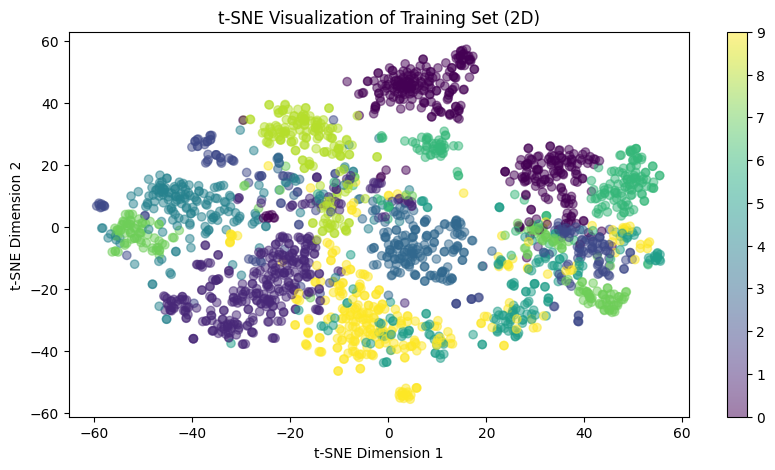

IndexError: index 2 is out of bounds for axis 1 with size 2

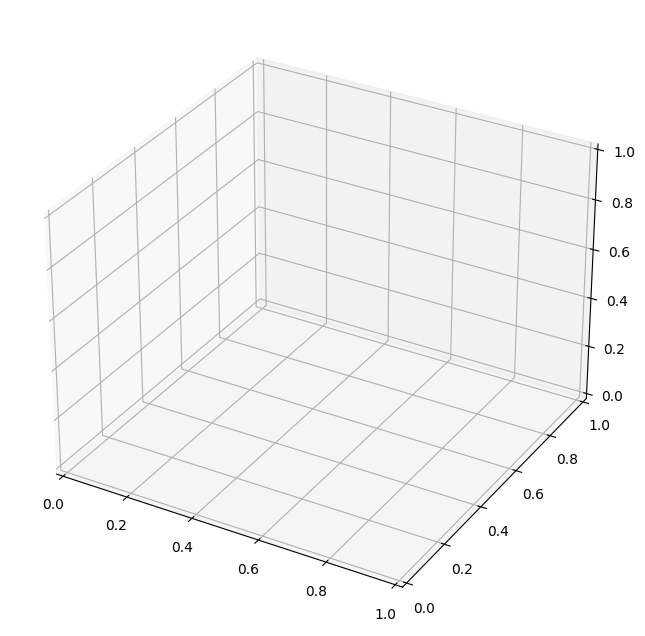

In [ ]:
import torch
import torchvision.models as models
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Define the ResNet-18 model with pretrained weights
model = models.resnet18(pretrained=True)

# Define the feature extractor (backbone)
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

# Function to extract feature vectors
def extract_features(loader):
    feature_vectors = []
    labels = []
    for inputs, targets in loader:
        inputs = inputs.to(device)
        features = feature_extractor(inputs).squeeze().cpu().detach().numpy()
        feature_vectors.extend(features)
        labels.extend(targets.numpy())
    return feature_vectors, labels

# Extract feature vectors and labels for training and validation sets
train_features, train_labels = extract_features(train_loader)
val_features, val_labels = extract_features(val_loader)

# Perform dimensionality reduction using t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# train_tsne = tsne.fit_transform(train_features)
# val_tsne = tsne.fit_transform(val_features)


# Convert lists to numpy arrays
train_features_np = np.array(train_features)
val_features_np = np.array(val_features)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(train_features_np)
val_tsne = tsne.fit_transform(val_features_np)



# Visualize t-SNE embeddings in 2D
plt.figure(figsize=(10, 5))
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE Visualization of Training Set (2D)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Visualize t-SNE embeddings in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(val_tsne[:, 0], val_tsne[:, 1], val_tsne[:, 2], c=val_labels, cmap='viridis', alpha=0.5)
# ax.set_title('t-SNE Visualization of Validation Set (3D)')
# ax.set_xlabel('t-SNE Dimension 1')
# ax.set_ylabel('t-SNE Dimension 2')
# ax.set_zlabel('t-SNE Dimension 3')
# plt.show()


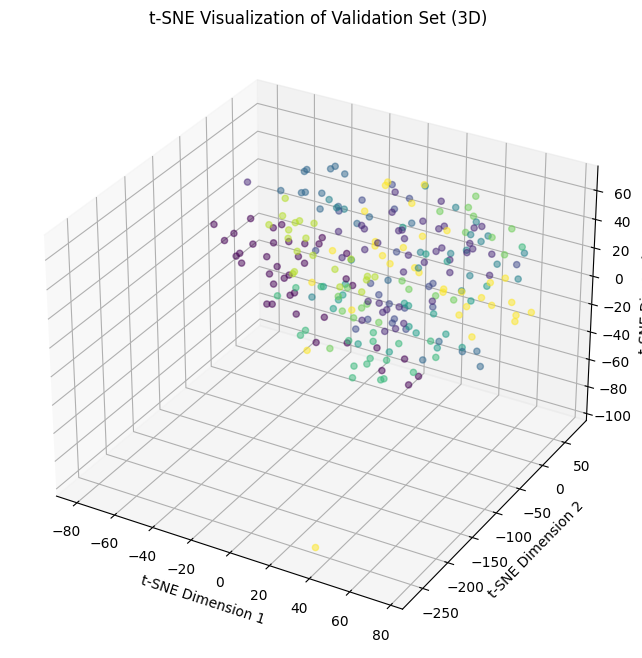

In [ ]:
import matplotlib.pyplot as plt

# Perform dimensionality reduction using t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
val_tsne_3d = tsne.fit_transform(val_features_np)

# Visualize t-SNE embeddings in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(val_tsne_3d[:, 0], val_tsne_3d[:, 1], val_tsne_3d[:, 2], c=val_labels, cmap='viridis', alpha=0.5)
ax.set_title('t-SNE Visualization of Validation Set (3D)')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()


Train Accuracy,▁
Train Loss,▁
Validation Accuracy,▁
Validation Loss,▁
Train Accuracy,59.31979
Train Loss,1.356
Validation Accuracy,87.30159
Validation Loss,0.54008


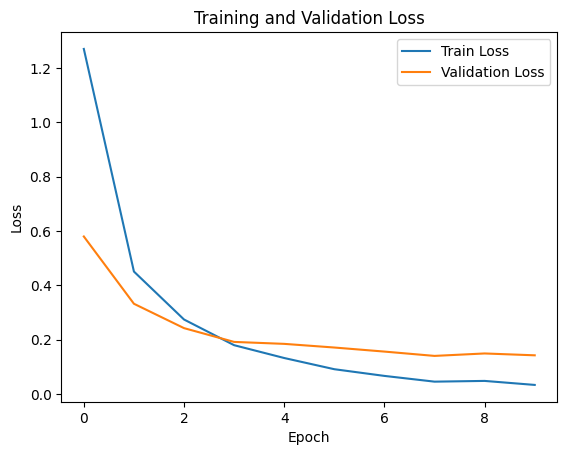

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import wandb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data augmentation transformations
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),               # Random rotation up to 30 degrees
    transforms.RandomHorizontalFlip(p=0.5),              # Random horizontal flip with a probability of 0.5
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(0.75, 1.333)),  # Random crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),                               # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # Normalize image
])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)


num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Initialize wandb
wandb.init(project='Question_4', entity='ieshaan')
num_epochs = 10

# Training and validation loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total

    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100. * correct / total

    val_losses.append(val_loss)

    # Log training and validation loss and accuracy
    wandb.log({'Train Loss': train_loss, 'Train Accuracy': train_accuracy,
               'Validation Loss': val_loss, 'Validation Accuracy': val_accuracy}, step=epoch)

# Plot training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Testing loop
model.eval()
test_labels = []
pred_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        test_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Calculate accuracy and F1-score on the test set
test_accuracy = accuracy_score(test_labels, pred_labels) * 100
test_f1_score = f1_score(test_labels, pred_labels, average='macro')

# Log accuracy and F1-score
wandb.log({'Test Accuracy': test_accuracy, 'Test F1-Score': test_f1_score})

# Calculate and log confusion matrix
conf_matrix = confusion_matrix(test_labels, pred_labels)
wandb.log({'Confusion Matrix': wandb.plot.confusion_matrix(probs=None,
                                                           y_true=test_labels,
                                                           preds=pred_labels)})


In [ ]:
import torch
import wandb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the test set
# # test_loader
class_names = ['amur leopard','amur tiger','birds','black bear','brown bear','dog','roe deer','sika deer','wild boar','people']
# Evaluate the model on the test set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Log metrics and confusion matrix using wandb
wandb.log({
    "Test Accuracy": accuracy,
    "Test F1-Score": f1,
    "Confusion Matrix": wandb.plot.confusion_matrix(probs=None,
                                                    y_true=y_true,
                                                    preds=y_pred,
                                                    class_names=class_names)
})
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print accuracy and F1-score
print(f'Test Accuracy: {accuracy}')
print(f'Test F1-Score: {f1}')

# Print classification report
print(report)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)



Test Accuracy: 0.9332273449920508
Test F1-Score: 0.9336045619688194
              precision    recall  f1-score   support

amur leopard       0.98      0.99      0.98        98
  amur tiger       0.95      0.97      0.96       100
       birds       0.92      0.92      0.92        50
  black bear       0.98      0.98      0.98        50
  brown bear       0.94      0.96      0.95        50
         dog       0.73      0.86      0.79        50
    roe deer       0.98      0.94      0.96        50
   sika deer       0.98      0.90      0.94        50
   wild boar       0.98      1.00      0.99        50
      people       0.89      0.80      0.84        81

    accuracy                           0.93       629
   macro avg       0.93      0.93      0.93       629
weighted avg       0.94      0.93      0.93       629

Confusion Matrix:
[[97  0  1  0  0  0  0  0  0  0]
 [ 0 97  1  0  1  1  0  0  0  0]
 [ 0  1 46  0  0  2  0  1  0  0]
 [ 0  0  1 49  0  0  0  0  0  0]
 [ 0  1  0  1 48  0  0 